In [62]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
class Layers:
    def __init__(self,input_dim,output_dim,activation="sigmoid",isInput=False): 
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation = activation
        self.W = np.random.randn(output_dim,input_dim) * 0.1
        if isInput is False:
            self.b = np.zeros((output_dim,1))
            self.db = None
        self.H = None
        self.A = None
        self.dW = None
        self.dH = None
    def activated_values(self,X):
        if self.activation == "sigmoid":
            X = np.clip(X, -500, 500)
            return 1/(1+np.exp(-X))
        if self.activation == "ReLU":
            relu = lambda x: x if x > 0 else 0
            return np.vectorize(relu)(X)
        if self.activation == "linear":
            return X 
        if self.activation == "Softmax":
            X = 1/(1+np.exp(-X))
            X = np.clip(X, -500, 500)
            return X / np.sum(X)

class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        self.W = []
        self.layers = layers
        self.alpha = alpha
    
    def forward(self,X):
        X = X.reshape(-1,1)
        h = self.layers[0].W @ X
        a = self.layers[0].activated_values(h)
        for i in range(1,len(self.layers)):
            h = self.layers[i].W @ a + self.layers[i].b
            a = self.layers[i].activated_values(h)
        return a
    
    def backPropagation(self,X,y):
        encoded_y = np.zeros((y.shape[0],np.max(y)+1))
        encoded_y[np.arange(y.shape[0]),y] = 1
        y_pred = self.forward(X)


In [95]:
def f(X):
    X = 1/(1+np.exp(-X))
    return X / np.sum(X)

In [96]:
X = np.arange(1,10).reshape(-1,3)
y = X.reshape(-1,1)
np.sum(f(y))

1.0

In [63]:
fashion_mnist_data = fashion_mnist.load_data()
train_data_x,train_data_y, test_data_x, test_data_y = fashion_mnist_data[0][0], fashion_mnist_data[0][1], fashion_mnist_data[1][0], fashion_mnist_data[1][1]
train_data_x, validation_data_x, train_data_y, validation_data_y = train_test_split(train_data_x, train_data_y, test_size=0.2)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


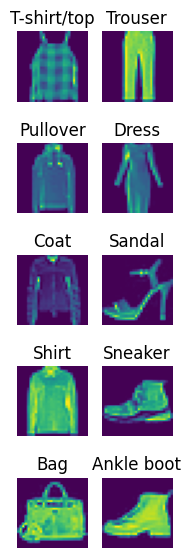

In [74]:
class_id,images_index_each_class = np.unique(train_data_y, return_index=True)
plt.figure(figsize=(2,7))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(train_data_x[images_index_each_class[i]])
    plt.title(class_names[class_id[i]])
    plt.axis('off')
plt.show()

In [124]:
model = NeuralNetwork([
    Layers(784,100,isInput=True),
    Layers(100,200),
    Layers(200,10,activation="Softmax"),
])

In [101]:
train_data_x[0].shape

(28, 28)

In [125]:
model.forward(train_data_x[0])

array([[0.13750415],
       [0.11715138],
       [0.0906671 ],
       [0.14301873],
       [0.03901105],
       [0.05645332],
       [0.08315485],
       [0.09578243],
       [0.13740368],
       [0.0998533 ]])

In [ ]:
train_data_y.shape
encoded_y = np.zeros((train_data_y.shape[0],np.max(train_data_y)+1))
encoded_y[np.arange(train_data_y.shape[0]),train_data_y] = 1


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [128]:
encoded_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])